Trying to load dataset from URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mall_customers.csv
Couldn't load from URL (error: HTTP Error 404: Not Found). Please upload the CSV file.


Saving Mall_Customers.csv to Mall_Customers.csv
Loaded uploaded file: Mall_Customers.csv

Dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dropping columns: ['CustomerID']


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Numeric columns used for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Scaled feature shape: (200, 3)
PCA explained variance ratio (2 comps): [0.44266167 0.33308378]


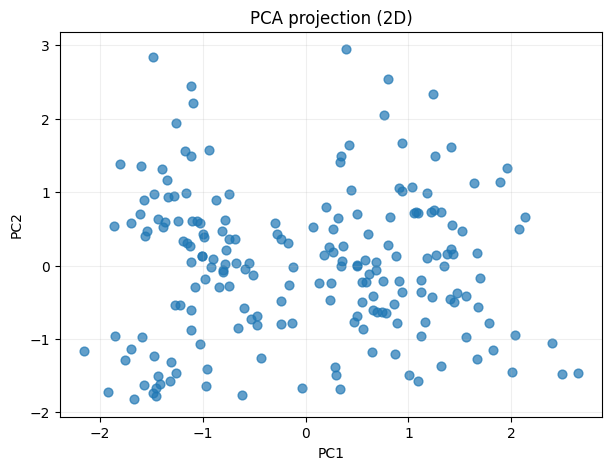

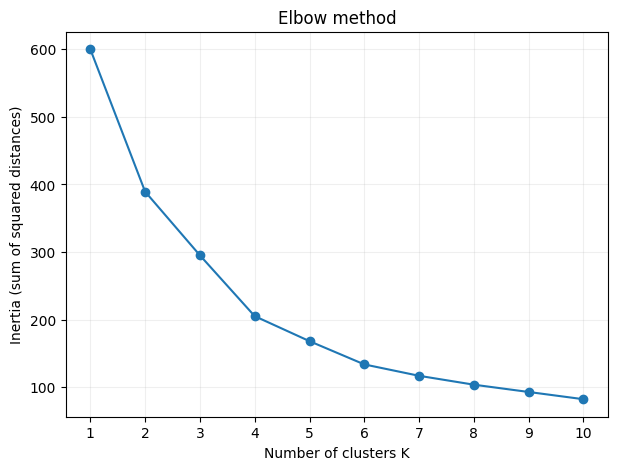

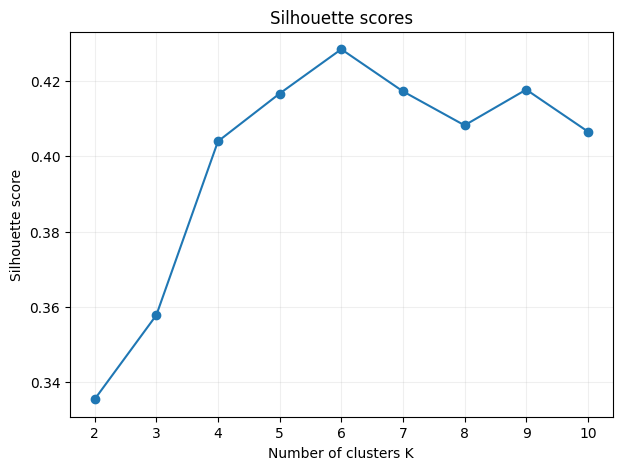


Silhouette scores:
K=2 -> silhouette = 0.3355
K=3 -> silhouette = 0.3578
K=4 -> silhouette = 0.4040
K=5 -> silhouette = 0.4166
K=6 -> silhouette = 0.4284
K=7 -> silhouette = 0.4172
K=8 -> silhouette = 0.4082
K=9 -> silhouette = 0.4177
K=10 -> silhouette = 0.4066

Choosing K = 5 (change 'chosen_k' in the code if you want another value)
KMeans fitted. Sample of labels: [0 1 2 3 4]

Sample rows with cluster labels:


,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,1


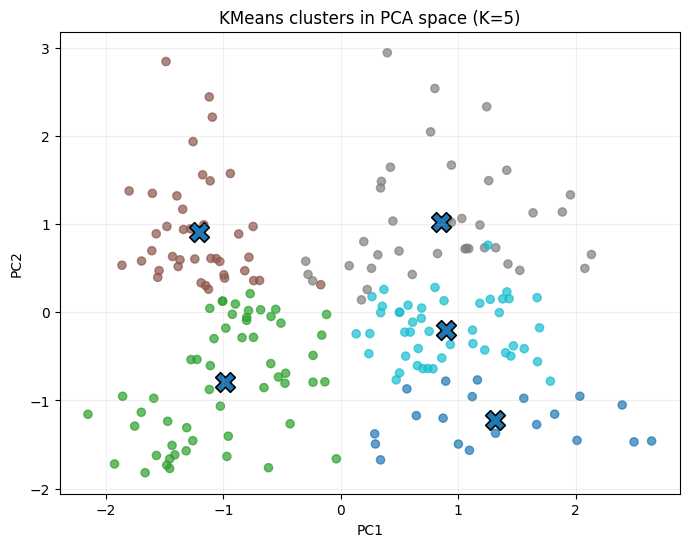


Cluster sizes:
cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64

Cluster means (original numeric columns):


cluster,0,1,2,3,4
Age,46.25,25.185185,32.875,39.871795,55.638298
Annual Income (k$),26.75,41.092593,86.100,86.102564,54.382979
Spending Score (1-100),18.35,62.240741,81.525,19.358974,48.851064



Approximate cluster centers (original feature values):


,Age,Annual Income (k$),Spending Score (1-100)
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064



Final silhouette score for K=5: 0.4166

Saved results to clustered_results.csv. Download from Colab Files panel or use files.download('clustered_results.csv').


In [1]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
from IPython.display import display
%matplotlib inline

plt.style.use('default')


DATA_URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mall_customers.csv"
print("Trying to load dataset from URL:", DATA_URL)
try:
    df = pd.read_csv(DATA_URL)
    print("Loaded from URL.")
except Exception as e:
    print("Couldn't load from URL (error: {}). Please upload the CSV file.".format(e))
    uploaded = files.upload()
    first_file = list(uploaded.keys())[0]
    df = pd.read_csv(first_file)
    print("Loaded uploaded file:", first_file)

print("\nDataset shape:", df.shape)
display(df.head())

# 3) Drop common ID/Name columns (if present)
drop_cols = [c for c in ['CustomerID','Customer Id','ID','Name'] if c in df.columns]
if drop_cols:
    print("Dropping columns:", drop_cols)
    df = df.drop(columns=drop_cols)
else:
    print("No common ID/Name columns to drop.")
display(df.head())

# 4) Select features - numeric columns by default (adjust if you want specific columns)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not num_cols:
    raise ValueError("No numeric columns found in dataframe. Provide numeric features for clustering.")
print("Numeric columns used for clustering:", num_cols)
X = df[num_cols].values.astype(float)

# 5) (Optional) If there are categorical columns you want to include, uncomment and modify:
# cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
# if cat_cols:
#     df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#     X = df_enc.values.astype(float)
#     num_cols = df_enc.columns.tolist()

# 6) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled feature shape:", X_scaled.shape)

# 7) PCA to 2D for plotting (no effect on clustering, only visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("PCA explained variance ratio (2 comps):", pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=40, alpha=0.7)
plt.title("PCA projection (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.grid(alpha=0.2)
plt.show()

# 8) Elbow method (inertia) for K = 1..10
Ks = list(range(1,11))
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(Ks, inertias, '-o')
plt.xticks(Ks)
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow method")
plt.grid(alpha=0.2)
plt.show()

# 9) Silhouette scores for K = 2..10
Ks_s = list(range(2,11))
sil_scores = []
for k in Ks_s:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(7,5))
plt.plot(Ks_s, sil_scores, '-o')
plt.xticks(Ks_s)
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores")
plt.grid(alpha=0.2)
plt.show()

print("\nSilhouette scores:")
for k, s in zip(Ks_s, sil_scores):
    print(f"K={k} -> silhouette = {s:.4f}")

# 10) Choose K and fit final KMeans
# Change chosen_k based on the elbow + silhouette results
chosen_k = 5
print(f"\nChoosing K = {chosen_k} (change 'chosen_k' in the code if you want another value)")
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=20)
labels_final = kmeans_final.fit_predict(X_scaled)
print("KMeans fitted. Sample of labels:", np.unique(labels_final))

# 11) Attach labels back to dataframe
df_with_clusters = df.copy()
df_with_clusters['cluster'] = labels_final
print("\nSample rows with cluster labels:")
display(df_with_clusters.head())

# 12) Visualize clusters on PCA map and cluster centers
centers_scaled = kmeans_final.cluster_centers_
# project centers into PCA space for plotting
centers_pca = pca.transform(centers_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_final, cmap='tab10', s=35, alpha=0.7)
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='X', s=200, edgecolor='k', linewidth=1.2)
plt.title(f"KMeans clusters in PCA space (K={chosen_k})")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.grid(alpha=0.2)
plt.show()

# 13) Cluster sizes and means (original scale)
print("\nCluster sizes:")
print(df_with_clusters['cluster'].value_counts().sort_index())

print("\nCluster means (original numeric columns):")
cluster_summary = df_with_clusters.groupby('cluster')[num_cols].mean().T
display(cluster_summary)

# approximate centers back to original feature space (inverse transform)
centers_orig = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_orig, columns=num_cols)
print("\nApproximate cluster centers (original feature values):")
display(centers_df)

# 14) Final silhouette for chosen_k
final_sil = silhouette_score(X_scaled, labels_final)
print(f"\nFinal silhouette score for K={chosen_k}: {final_sil:.4f}")

# 15) Save results CSV
out_file = "clustered_results.csv"
df_with_clusters.to_csv(out_file, index=False)
print(f"\nSaved results to {out_file}. Download from Colab Files panel or use files.download('{out_file}').")
